In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline  
from PIL import Image
from shutil import copyfile
import numpy as np 
dir_path = os.getcwd()+'/img/'
people=['Vishal Singh','Vijaya Shekhar','Debolina Banerjee','Shailaja Tirkey','Bidisha Mahato','Mimansha Jyoti','Harshit Toppo','Rishabh Maharshee','Mobashshir Jawaid','Sarvagya Mehrotra','Abhishek Ghosh','Ankit Chaudhary']
def readFiles(path):
    global maxWidth,maxHeight
    maxWidth=0
    maxHeight=0
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            im=Image.open(path+file)
            if im.size[0]>maxWidth :
                maxWidth=im.size[0]
            if im.size[1]>maxHeight :
                maxHeight=im.size[1]
    return
def processFiles(path):
    newpath= os.getcwd()+'/imgproc/'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for file in os.listdir(path):
        im=Image.new('RGB',(maxWidth,maxHeight),'black')
        newname = file.split('.')
        if file.endswith('.JPG'):
            newIM = Image.open(path+file)
            offset = ((maxWidth - newIM.size[0]) / 2, (maxHeight - newIM.size[1]) / 2)
            im.paste(newIM,offset)
            im.rotate(-90).save(newpath+newname[0]+'proc.JPG')
    return
def resizeImage(path):
    for file in os.listdir(path):
        newname = file.split('.')
        if file.endswith('.JPG'):
            newIM = Image.open(path+file)
            im = newIM.resize((128,128))
            im.save(path+newname[0]+'.JPG')
    return
def toGrayscale(path):
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            img= Image.open(path+file).convert('L')
            img.save(path+file)
    return
def trainandtest(path):
    traindat= os.getcwd()+'/imgtrain/'
    testdat= os.getcwd()+'/imgtest/'
    if not os.path.exists(traindat):
        os.makedirs(traindat)
    if not os.path.exists(testdat):
        os.makedirs(testdat)
    i=1
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            if i<8:
                copyfile(path+file,traindat+file)
            else:
                copyfile(path+file,testdat+file)
            if i==10:
                i=1
            else:
                i=i+1
    return
def getPixel(path):
    result_arr = np.empty((16384,0))
    target = np.empty((0,12))
    names = []
    
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            names.append(file)
  
    count = 0
    
    for file in names:
        if file.endswith('.JPG'):
            img = Image.open(path+file)
            arr=np.array(img.getdata())
            #print file[:-9]
            tar = people.index(file[:-9])
            dummy = np.zeros ((1,12));
            dummy[0][tar] = 1;
            target = np.append(target,dummy,axis=0)
            print file[:-9], tar,target[count]
            flat_arr=arr.ravel()
            flat_arr= np.reshape(flat_arr,(flat_arr.size,1))
            result_arr=np.append(result_arr,flat_arr,axis=1)
            count+=1
    result_arr = np.array(result_arr)
    result_arr = np.append(result_arr,np.ones((1,count)),axis=0)
    return (result_arr,target)


In [ ]:
readFiles(dir_path)
processFiles(dir_path)
resizeImage(os.getcwd()+'/imgproc/')
toGrayscale(os.getcwd()+'/imgproc/')

In [3]:
readFiles(dir_path)

In [4]:
trainandtest(os.getcwd()+'/imgproc/')

In [2]:
def sigmoid(u):
      return 1. / (1. + np.e ** -u)

In [35]:
def backprop():
    (input_arr,train_target)=getPixel(os.getcwd()+'/imgtrain/')
    input_arr=np.transpose(input_arr)
    input_arr = input_arr/255 #normalise
    
    alpha=0.006
    #initialising weights
    weight1 = np.random.randn(16385,700) 
    weight2 = np.random.randn(700,12) 

    i=0
    error = 1000
    while ((error>30 and i<2000)):
        #forward Pass
        hiddenLayerInput = np.dot(input_arr,weight1)
        hiddenLayerOutput = sigmoid(hiddenLayerInput)
        outputLayerInput = np.dot(hiddenLayerOutput,weight2)
        FinalOutput = sigmoid(outputLayerInput)

        #error calculation
        difference= train_target - FinalOutput
        error=np.sum(np.square(difference))/2.0
        plt.plot(i,error,'r*')
        print error, i

        #weight updation output layer
        delta = -1.0*(difference)*FinalOutput*(1.0-FinalOutput)
        weight2 -= (alpha*np.dot(np.transpose(hiddenLayerOutput),delta))

        #weight updation hidden layers
        temp = hiddenLayerOutput*(1.0-hiddenLayerOutput)
        temp2 = np.dot((delta),np.transpose(weight2))*temp
        weight1 -= alpha*np.dot(np.transpose(input_arr),temp2)
        i+=1
        #print error
    print "Number of iterations : " , i , " Error : ",error 
    return(weight1, weight2,train_target)
    

Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Bidisha Mahato 4 [ 0.  0.  0.  0.  1.  0.

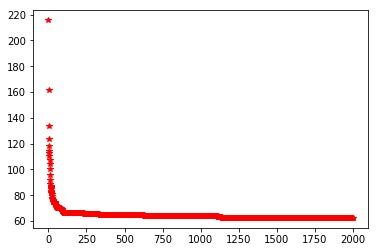

In [36]:
(weight1,weight2,train_target) = backprop()

In [37]:
def testBackProp(weight1, weight2,train_target):
    (input_arr,test_target)=getPixel(os.getcwd()+'/imgtest/')
    input_arr = np.transpose(input_arr)
    input_arr=input_arr/255 #normalise
    
    hiddenLayerInput = np.dot(input_arr,weight1)
    hiddenLayerOutput = sigmoid(hiddenLayerInput)
    outputLayerInput = np.dot(hiddenLayerOutput,weight2)
    FinalOutput = sigmoid(outputLayerInput)
    
    y_pred_class = np.argmax(FinalOutput,axis=1)
    y_test_class = np.argmax(test_target,axis=1)
    print y_pred_class
    print y_test_class
    
    success =0.0;failure =0.0; result=0.0
    for i in range(0,test_target.shape[0]):
       
        if(y_pred_class[i]==y_test_class[i]):
            success+=1
        else:
            failure+=1
    print success,y_test_class.shape
    result = success / y_test_class.shape[0]
    print (result*100)
    return 


In [38]:
testBackProp(weight1,weight2,train_target)

Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Abhishek Ghosh 10 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Ankit Chaudhary 11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Bidisha Mahato 4 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Bidisha Mahato 4 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Bidisha Mahato 4 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Debolina Banerjee 2 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Debolina Banerjee 2 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Debolina Banerjee 2 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Harshit Toppo 6 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
Harshit Toppo 6 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
Harshit Toppo 6 [ 0.  0.  0.  0.  0.  0.  1.  